<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor


### Introduction

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.

### Step 1: Data Loading and Preprocessing

#### Task 1: Load the League of Legends dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.

Please take responsibility for managing and installing all the required libraries for this lab on your own.

#### Exercise 1:

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.


In [2]:
## Write your code here
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
data = pd.read_csv('/content/league_of_legends_data_large.csv')  # Update with the correct file path

In [3]:
data.head()

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [7]:
# Split data into features (X) and target (y)
X = data.drop(columns=['win'])
y = data['win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

### Step 2: Logistic Regression Model

#### Task 2: Implement a logistic regression model using PyTorch.

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.

#### Exercise 2:

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.


In [8]:
## Write your code here
import torch
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # A single linear layer
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        # Apply the linear layer followed by sigmoid activation
        return torch.sigmoid(self.linear(x))

# Initialize model parameters
input_dim = X_train_tensor.shape[1]  # Number of features
model = LogisticRegressionModel(input_dim)

# Define the loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Define the optimizer (e.g., SGD or Adam)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # or you could use optim.Adam

# Model summary
print(model)


LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .

#### Exercise 3:

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.


In [9]:
# Write your code here
# Define the number of epochs
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Set model to training mode
    model.train()

    # Forward pass: compute predictions and loss
    outputs = model(X_train_tensor).squeeze()  # squeeze to match target shape
    loss = criterion(outputs, y_train_tensor)

    # Backward pass: compute gradient and update parameters
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    # Convert probabilities to binary outputs (0 or 1)
    predicted = y_pred.round()
    correct = (predicted == y_true).sum().item()
    return correct / len(y_true)

# Set model to evaluation mode
model.eval()
with torch.no_grad():  # Disable gradient calculation for evaluation
    # Evaluate on training set
    train_outputs = model(X_train_tensor).squeeze()
    train_accuracy = calculate_accuracy(y_train_tensor, train_outputs)

    # Evaluate on testing set
    test_outputs = model(X_test_tensor).squeeze()
    test_accuracy = calculate_accuracy(y_test_tensor, test_outputs)

print(f'Accuracy on training set: {train_accuracy * 100:.2f}%')
print(f'Accuracy on testing set: {test_accuracy * 100:.2f}%')


Epoch [10/100], Loss: 0.7174
Epoch [20/100], Loss: 0.7160
Epoch [30/100], Loss: 0.7146
Epoch [40/100], Loss: 0.7134
Epoch [50/100], Loss: 0.7122
Epoch [60/100], Loss: 0.7110
Epoch [70/100], Loss: 0.7099
Epoch [80/100], Loss: 0.7088
Epoch [90/100], Loss: 0.7077
Epoch [100/100], Loss: 0.7068
Accuracy on training set: 53.75%
Accuracy on testing set: 48.50%


### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

#### Exercise 4:

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.


In [10]:
## Write your code here
# Redefine the optimizer with L2 regularization
# Higher weight_decay values increase the regularization effect
l2_weight_decay = 0.01  # You can adjust this value based on tuning
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_weight_decay)

# Number of epochs for retraining
num_epochs = 100

# Retrain the model with L2 regularization
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    outputs = model(X_train_tensor).squeeze()  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute the loss

    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update parameters

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss with L2 Regularization: {loss.item():.4f}')

# Evaluate the model on training and testing sets after retraining
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Calculate accuracy on the training set
    train_outputs = model(X_train_tensor).squeeze()
    train_accuracy = calculate_accuracy(y_train_tensor, train_outputs)

    # Calculate accuracy on the testing set
    test_outputs = model(X_test_tensor).squeeze()
    test_accuracy = calculate_accuracy(y_test_tensor, test_outputs)

print(f'Accuracy on training set after L2 regularization: {train_accuracy * 100:.2f}%')
print(f'Accuracy on testing set after L2 regularization: {test_accuracy * 100:.2f}%')


Epoch [10/100], Loss with L2 Regularization: 0.7058
Epoch [20/100], Loss with L2 Regularization: 0.7048
Epoch [30/100], Loss with L2 Regularization: 0.7039
Epoch [40/100], Loss with L2 Regularization: 0.7030
Epoch [50/100], Loss with L2 Regularization: 0.7022
Epoch [60/100], Loss with L2 Regularization: 0.7014
Epoch [70/100], Loss with L2 Regularization: 0.7007
Epoch [80/100], Loss with L2 Regularization: 0.6999
Epoch [90/100], Loss with L2 Regularization: 0.6993
Epoch [100/100], Loss with L2 Regularization: 0.6986
Accuracy on training set after L2 regularization: 54.62%
Accuracy on testing set after L2 regularization: 48.50%


### Step 5: Visualization and Interpretation

#### Task 5: Visualize the model's performance and interpret the results.

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

#### Exercise 5:

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


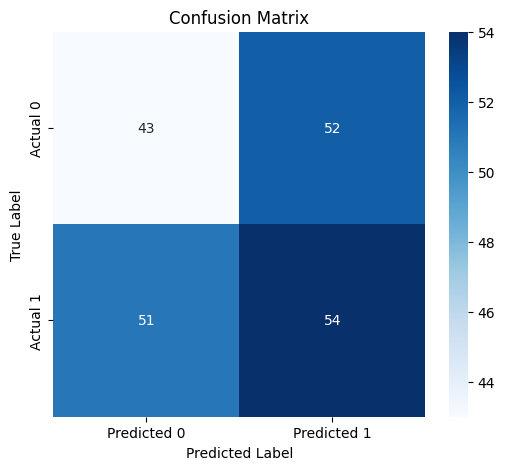

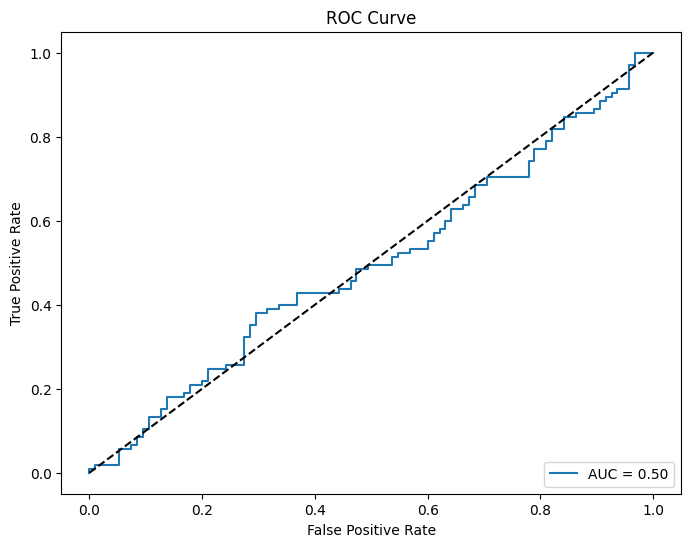

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.46      0.45      0.46        95
     Class 1       0.51      0.51      0.51       105

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200



In [11]:
## Write your code here
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate predictions on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = test_outputs.round()  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test_tensor, test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test_tensor, test_outputs)
auc_score = roc_auc_score(y_test_tensor, test_outputs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_tensor, test_predictions, target_names=["Class 0", "Class 1"]))


### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.

#### Exercise 6:

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.


In [12]:
## Write your code here
import torch

# Define the path where the model will be saved
model_path = "logistic_regression_model.pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Load the model state dictionary
loaded_model = LogisticRegressionModel(input_dim)  # Reinitialize the model structure
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # Set the loaded model to evaluation mode
print("Model loaded successfully and set to evaluation mode.")

# Evaluate the loaded model on the test set
with torch.no_grad():
    test_outputs_loaded = loaded_model(X_test_tensor).squeeze()
    test_predictions_loaded = test_outputs_loaded.round()  # Convert probabilities to binary predictions

# Verify if the loaded model's performance is consistent by calculating accuracy
loaded_test_accuracy = calculate_accuracy(y_test_tensor, test_outputs_loaded)
print(f"Accuracy on testing set after loading the model: {loaded_test_accuracy * 100:.2f}%")


Model saved to logistic_regression_model.pth
Model loaded successfully and set to evaluation mode.
Accuracy on testing set after loading the model: 48.50%


<ipython-input-12-63e3073bcbbd>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .

#### Exercise 7:

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.


In [13]:
## Write your code here
# Define a list of learning rates to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2]
num_epochs = 100
best_accuracy = 0
best_lr = None

# Dictionary to store test accuracy for each learning rate
results = {}

for lr in learning_rates:
    # Reinitialize the model for each learning rate
    model = LogisticRegressionModel(input_dim)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=l2_weight_decay)

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_accuracy = calculate_accuracy(y_test_tensor, test_outputs)

    # Store the test accuracy for this learning rate
    results[lr] = test_accuracy
    print(f"Learning Rate: {lr}, Test Accuracy: {test_accuracy * 100:.2f}%")

    # Update best learning rate if current test accuracy is higher
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_lr = lr

print(f"\nBest Learning Rate: {best_lr}, with Test Accuracy: {best_accuracy * 100:.2f}%")

Learning Rate: 0.001, Test Accuracy: 50.50%
Learning Rate: 0.01, Test Accuracy: 50.00%
Learning Rate: 0.05, Test Accuracy: 54.50%
Learning Rate: 0.1, Test Accuracy: 50.50%
Learning Rate: 0.2, Test Accuracy: 51.00%

Best Learning Rate: 0.05, with Test Accuracy: 54.50%


### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.

#### Exercise 8:

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


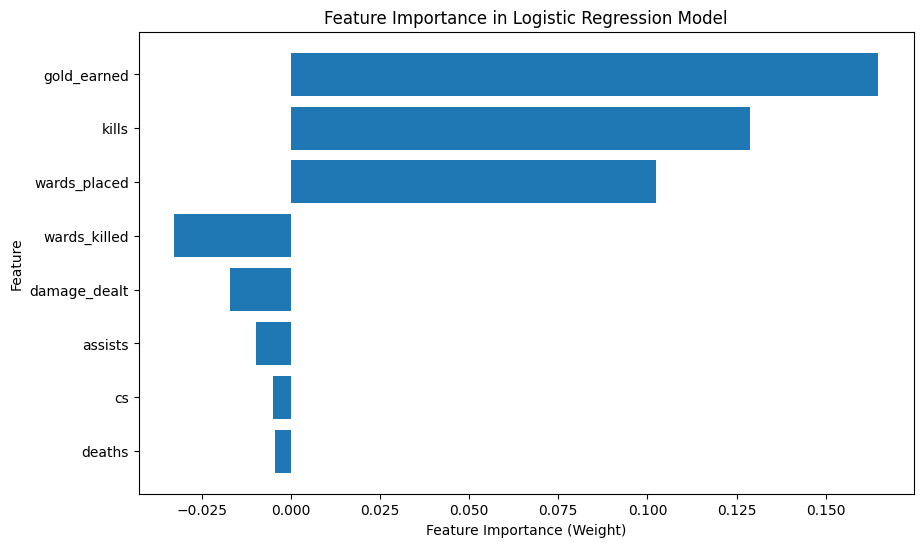

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names from the DataFrame
feature_names = X.columns  # Assuming X is the feature DataFrame used for training

# Extract weights (coefficients) from the linear layer
weights = model.linear.weight.data.numpy().flatten()  # Convert to numpy array and flatten to 1D

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': weights
})

# Sort features by absolute importance for better visualization
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel("Feature Importance (Weight)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression Model")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


#### Conclusion:

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
